In [1]:
import pandas as pd

# Load the CSV data into a DataFrame
file_path = 'CSCS_data_anon (1).csv'  # Replace this with the correct path if needed
df = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print(df.head())


/tmp/ipykernel_426/150305857.py:5: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


    UNIQUE_id  UNIQUE_num_records ELIGIBLE_consent GEO_residence_canada  \
0  cscs_00001                   1              Yes                  Yes   
1  cscs_00002                   1              Yes                  Yes   
2  cscs_00003                   1              Yes                  Yes   
3  cscs_00005                   1              Yes                  Yes   
4  cscs_00006                   1              Yes                  Yes   

       GEO_province  DEMO_age DEMO_gender DEMO_identity_vetrans  \
0  British Columbia      71.0  Non-binary                   NaN   
1           Ontario      69.0       Woman                   NaN   
2            Quebec      56.0       Woman                   NaN   
3               NaN      54.0       Woman                   NaN   
4           Ontario      30.0         Man          Not Selected   

                            DEMO_identity_indigenous  \
0                                                NaN   
1                                 

In [6]:
# Subset the dataset to include only the two variables
subset_df = df[['COVID_prevention_masks', 'COVID_vaccinated']]

# Display the first 10 rows of the subset
print(subset_df.head(11))


   COVID_prevention_masks          COVID_vaccinated
0        Somewhat closely  Yes, three or more doses
1              Not at all  Yes, three or more doses
2              Not at all  Yes, three or more doses
3              Not at all  Yes, three or more doses
4            Very closely             Yes, one dose
5            Very closely  Yes, three or more doses
6        Somewhat closely            Yes, two doses
7            Very closely  Yes, three or more doses
8            Very closely             Yes, one dose
9              Not at all  Yes, three or more doses
10             Not at all                        No


   COVID_prevention_masks          COVID_vaccinated
0                     1.0  Yes, three or more doses
1                     0.0  Yes, three or more doses
2                     0.0  Yes, three or more doses
3                     0.0  Yes, three or more doses
4                     2.0             Yes, one dose
5                     2.0  Yes, three or more doses
6                     1.0            Yes, two doses
7                     2.0  Yes, three or more doses
8                     2.0             Yes, one dose
9                     0.0  Yes, three or more doses
10                    0.0                        No
11                    0.0                        No
13                    2.0            Yes, two doses
14                    0.0           Yes, four doses
15                    2.0  Yes, three or more doses
   COVID_prevention_masks          COVID_vaccinated
0                     1.0  Yes, three or more doses
1                     0.0  Yes, three or more doses
2           

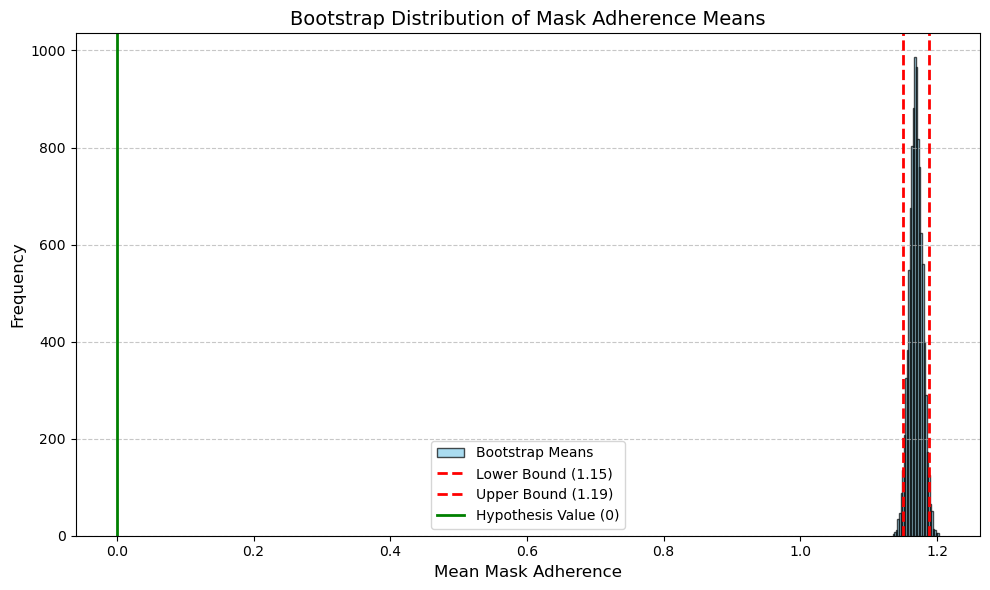

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the subset
# subset_df = df[['COVID_prevention_masks', 'COVID_vaccinated']]

# Step 1: Map categorical values to numerical values for `COVID_prevention_masks` using `.loc`
subset_df.loc[:, 'COVID_prevention_masks'] = subset_df['COVID_prevention_masks'].map({
    'Not at all': 0,
    'Somewhat closely': 1,
    'Very closely': 2
})

# Step 2: Drop rows with missing values in the subset
subset_cleaned = subset_df.dropna()

# Step 3: Filter only vaccinated individuals (at least one dose)
vaccinated_df = subset_cleaned[subset_cleaned['COVID_vaccinated'] != 'No']

# Step 4: Perform Bootstrapping with a fixed random seed
n_bootstrap = 10000  # Number of bootstrap samples
bootstrap_means = []

# Set random seed for reproducibility
np.random.seed(42)

# Generate bootstrap samples and calculate means
for _ in range(n_bootstrap):
    sample = vaccinated_df['COVID_prevention_masks'].sample(frac=1, replace=True)
    bootstrap_means.append(sample.mean())

# Clean bootstrap_means for invalid values
bootstrap_means_clean = [mean for mean in bootstrap_means if pd.notnull(mean) and np.isfinite(mean)]

# Step 5: Calculate 95% Confidence Interval
lower_bound = np.percentile(bootstrap_means_clean, 2.5)
upper_bound = np.percentile(bootstrap_means_clean, 97.5)

# Step 6: Hypothesis Testing
if lower_bound <= 0 <= upper_bound:
    conclusion = "Not enough evidence to reject the hypothesis that vaccinated people do not wear masks at all."
else:
    conclusion = "Vaccinated people still wear masks in public."

# Print results
print(f"95% Confidence Interval for mask adherence: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Conclusion: {conclusion}")

# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means_clean, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Bootstrap Means')

# Add vertical lines for the 95% Confidence Interval
plt.axvline(x=lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(x=upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound ({upper_bound:.2f})')

# Add vertical line for zero
plt.axvline(x=0, color='green', linestyle='-', linewidth=2, label='Hypothesis Value (0)')

# Add labels and title
plt.title('Bootstrap Distribution of Mask Adherence Means', fontsize=14)
plt.xlabel('Mean Mask Adherence', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**- Question: How does vaccination status influence the likelihood of individuals wearing masks in public settings? Hypothesis: Individuals who have received at least one dose of the COVID-19 vaccine do not wear masks in public** <br>
**- Method of analysis: Bootstrapping on observed data** <br>
**- Below is a first few rows of the collected data from the CSCS dataset**<br>

In [7]:
print(subset_df.head(11))

   COVID_prevention_masks          COVID_vaccinated
0        Somewhat closely  Yes, three or more doses
1              Not at all  Yes, three or more doses
2              Not at all  Yes, three or more doses
3              Not at all  Yes, three or more doses
4            Very closely             Yes, one dose
5            Very closely  Yes, three or more doses
6        Somewhat closely            Yes, two doses
7            Very closely  Yes, three or more doses
8            Very closely             Yes, one dose
9              Not at all  Yes, three or more doses
10             Not at all                        No


- Process: Assign a discrete value for each categorical value of the variable COVID_prevention_masks: 0 for Not at all, 1 for Somewhat closely, 2 for Very closely Drop the observations with missing values From the variable COVID_vaccinated, this analysis will omit those who are not vaccinated, and only take into account people who at least have one dose of COVID-19 vaccine. 
- **Below is the first few rows in the dataset after doing data cleaning, which involves dropping NAN and exclude those who are not vaccinated. (Include the data table below, and the bootstrap plot)**

In [9]:
print(vaccinated_df.head(11))

   COVID_prevention_masks          COVID_vaccinated
0                     1.0  Yes, three or more doses
1                     0.0  Yes, three or more doses
2                     0.0  Yes, three or more doses
3                     0.0  Yes, three or more doses
4                     2.0             Yes, one dose
5                     2.0  Yes, three or more doses
6                     1.0            Yes, two doses
7                     2.0  Yes, three or more doses
8                     2.0             Yes, one dose
9                     0.0  Yes, three or more doses
13                    2.0            Yes, two doses


- Then from the observed variable COVID_prevention_masks, I will bootstrap 10000 samples with replacement, and create a random seed for reproduction. Then from the bootstrapped sample, I will find the 95% Confidence Interval, wich is (1.15, 1.19). The 95% confidence interval depicts that 0 is not a plausible value, so I have 95% confidence to reject the null hypothesis of vaccinated people do not wear mask at all in public, and conclude that, vaccinated people still where mask in public. Since the CI contains values that is relatively close to 1, I can say that their mask wearing adherence is somewhat closely.